In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
plt.rcParams['font.sans-serif'] = ['Arial']  
plt.rcParams['axes.unicode_minus'] = False


In [57]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
print("\n缺失值统计：")
print(df.isnull().sum())


缺失值统计：
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [60]:
print("\nChurn 值分布：")
print(df['Churn'].value_counts())


Churn 值分布：
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [61]:
df['TotalCharges'].dtype

dtype('O')

In [62]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [63]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [64]:
df.drop('customerID', axis=1, inplace=True)


In [65]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


In [66]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [67]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [70]:
print(type(y_train))
print(y_train[:5])
print(y_train.shape)


<class 'pandas.core.series.Series'>
2142    0
1623    0
6074    1
1362    1
6754    0
Name: Churn, dtype: int64
(5634,)


In [71]:
df_encoded.isnull().sum().sort_values(ascending=False).head(10)


TotalCharges                             11
SeniorCitizen                             0
OnlineBackup_Yes                          0
PaymentMethod_Electronic check            0
PaymentMethod_Credit card (automatic)     0
PaperlessBilling_Yes                      0
Contract_Two year                         0
Contract_One year                         0
StreamingMovies_Yes                       0
StreamingMovies_No internet service       0
dtype: int64

In [72]:
df_encoded = df_encoded.dropna()


In [73]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[915 118]
 [181 193]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [76]:
y_probs = model.predict_proba(X_test_scaled)[:, 1]


In [110]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)


In [112]:
auc_score = roc_auc_score(y_test, y_probs)

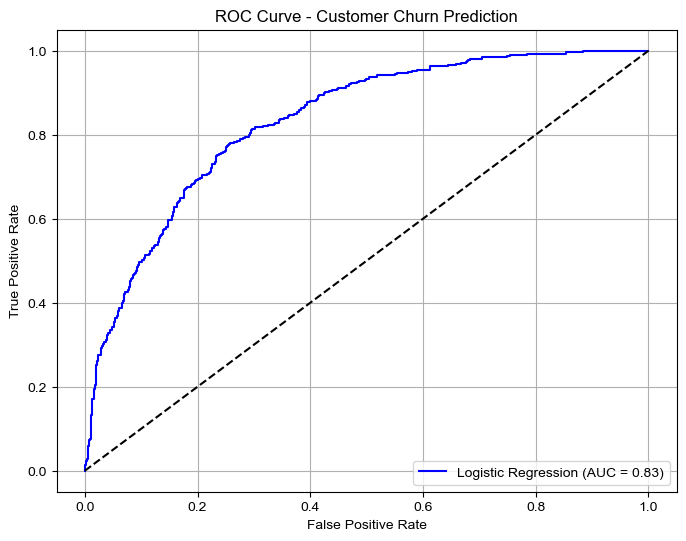

In [115]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Customer Churn Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()